# Loading the dependencies

In [1]:
! pip install pandas-profiling

# Loading the data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# '/content/drive/MyDrive/Summer2023/datathon/team2/data/pulseox_dataset.csv'

In [4]:
import pandas as pd

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Path to your CSV file
# csv_path = '/content/drive/MyDrive/Summer2023/datathon/team2/data/pulseox_dataset.csv'
csv_path = '/Users/mac/Desktop/Summer_2023/datathon/pulseox_dataset.csv'


# Read the CSV file using Pandas
df_initial = pd.read_csv(csv_path)

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_55555/440743242.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_initial = pd.read_csv(csv_path)


# Data Preprocessing

In [5]:
# Display the first few rows of the DataFrame
print(df_initial.head())

   unique_subject_id  unique_hospital_admission_id  unique_icustay_id  \
0                  0                             0                  0   
1                  1                             1                  1   
2                  2                             2                  2   
3                  3                             3                  3   
4                  4                             4                  4   

  subject_id  hospital_admission_id  icustay_id source_db  hospitalid  \
0  002-10050                 183274      211144      eicu          71   
1   002-1007                 178462      204935      eicu          71   
2  002-10187                 150828      169525      eicu          73   
3  002-10306                 198249      230427      eicu          63   
4  002-10324                 188445      217835      eicu          73   

  numbedscategory  teachingstatus  ... delta_sofa_future_coagulation_24hr  \
0       100 - 249           False  ...       

In [6]:
df_initial.shape

(49093, 142)

In [7]:
# Assume 'df_initial' is your DataFrame
column_names = df_initial.columns.tolist()

print("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

In [8]:
column_names

['unique_subject_id',
 'unique_hospital_admission_id',
 'unique_icustay_id',
 'subject_id',
 'hospital_admission_id',
 'icustay_id',
 'source_db',
 'hospitalid',
 'numbedscategory',
 'teachingstatus',
 'region',
 'admission_age',
 'sex_female',
 'weight_admission',
 'height_admission',
 'BMI_admission',
 'datetime_hospital_admit',
 'datetime_hospital_discharge',
 'datetime_icu_admit',
 'datetime_icu_discharge',
 'los_hospital',
 'los_ICU',
 'comorbidity_score_name',
 'comorbidity_score_value',
 'in_hospital_mortality',
 'race_ethnicity',
 'SaO2_timestamp',
 'pH',
 'pCO2',
 'pO2',
 'SaO2',
 'SpO2',
 'Carboxyhemoglobin',
 'Methemoglobin',
 'SpO2_timestamp',
 'delta_SpO2',
 'delta_vitals_heart_rate',
 'vitals_heart_rate',
 'delta_vitals_resp_rate',
 'vitals_resp_rate',
 'delta_vitals_mbp_ni',
 'vitals_mbp_ni',
 'delta_vitals_sbp_ni',
 'vitals_sbp_ni',
 'delta_vitals_dbp_ni',
 'vitals_dbp_ni',
 'delta_vitals_mbp_i',
 'vitals_mbp_i',
 'delta_vitals_sbp_i',
 'vitals_sbp_i',
 'delta_vitals_db

In [9]:
# removing all the non necessary columns

# Columns starting with 'datetime' to drop
datetime_columns = [col for col in df_initial.columns if col.startswith('datetime')]

# Columns starting with 'delta' to drop
delta_columns = [col for col in df_initial.columns if col.startswith('delta')]

# Drop the datetime columns
df_datetime_dropped = df_initial.drop(columns=datetime_columns)

# Drop the extra columns
df_col_dropped = df_datetime_dropped.drop(columns=delta_columns)

In [10]:
# Assume 'df_col_dropped' is your DataFrame
column_names_new = df_col_dropped.columns.tolist()

print("Column names:", column_names_new)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'vitals_heart_rate', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_mbp_i', 'vitals_sbp_i', 'vitals_dbp_i', 'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet', 'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_fibrinogen', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_ca

In [11]:
# Columns starting with 'sofa' to drop
# we want to keep sofa_past_overall_24hr
sofa_columns = [col for col in df_col_dropped.columns if col.startswith('sofa') and col != 'sofa_past_overall_24hr']
    
# Drop the sofa columns
df_dropped_without_sofa = df_col_dropped.drop(columns=sofa_columns)

extra_col_to_drop = ['subject_id', 'hospital_admission_id', 'icustay_id']

# Drop the specified columns
df_dropped_final = df_dropped_without_sofa.drop(columns=extra_col_to_drop)


In [12]:
# Assume 'df_dropped_final' is your DataFrame
column_names_final = df_dropped_final.columns.tolist()

print("Column names:", column_names_final)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'vitals_heart_rate', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_mbp_i', 'vitals_sbp_i', 'vitals_dbp_i', 'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet', 'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_fibrinogen', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast

## Handling Missing values

In [13]:
# Drop rows with any missing values
df_cleaned_test = df_dropped_final.dropna()

# Display the shape of the cleaned DataFrame to see how many rows remain
print("Original shape:", df_dropped_final.shape)
print("Cleaned shape:", df_cleaned_test.shape)

Original shape: (49093, 70)
Cleaned shape: (1, 70)


Each row has at least one missing value, thus, cleaning the dataset from all missing values leaves us with no rows. Therefore, we look for a new approach. 

In [14]:
# Calculate the percentage of missing values in each column
missing_percentage = (df_dropped_final.isnull().sum() / len(df_dropped_final)) * 100

# Create a DataFrame to hold missing info
missing_info = pd.DataFrame({
    'ColumnName': missing_percentage.index,
    'MissingPercentage': missing_percentage.values
})

# Filter columns with missing percentage larger than 50 (TO VARY WITH DOCTORS) - DISCUSS 
columns_with_missing = missing_info[missing_info['MissingPercentage'] > 60]

# Display the filtered DataFrame as a table
display(columns_with_missing)

ColumnName  MissingPercentage
25     Carboxyhemoglobin          77.675025
26         Methemoglobin          78.457214
33          vitals_mbp_i          63.306378
34          vitals_sbp_i          64.685393
35          vitals_dbp_i          64.701689
46       coag_fibrinogen          83.698287
64  hfp_bilirubin_direct          88.458640
66         others_ck_cpk          74.912920
67          others_ck_mb          81.848736
68         others_ld_ldh          91.012975

### Removing unnecessary Columns

In [15]:
# columns_with_missing is a dataframe
# List of column names with missing values
columns_to_drop = columns_with_missing['ColumnName'].tolist()

In [16]:
# Drop the columns from your DataFrame  -> droping all the columns with > 50% missing values
df_cleaned_from_col = df_dropped_final.drop(columns=columns_to_drop, axis=1)

# Display the shape of the cleaned DataFrame to see the changes 
print("Original shape:", df_dropped_final.shape)
print("Cleaned shape:", df_cleaned_from_col.shape)

Original shape: (49093, 70)
Cleaned shape: (49093, 60)


### Removing unnecessary Rows

In [ ]:
# Assuming your DataFrame is named 'df_cleaned'
row_missing_percentages = df_cleaned_from_col.isnull().mean(axis=1) * 100

# Print the rows with their missing percentages
for index, missing_percentage in enumerate(row_missing_percentages):
    print(f"Row {index + 1}: Missing Percentage = {missing_percentage:.2f}%")

Row 44157: Missing Percentage = 16.67%
Row 44158: Missing Percentage = 8.33%
Row 44159: Missing Percentage = 20.00%
Row 44160: Missing Percentage = 15.00%
Row 44161: Missing Percentage = 8.33%
Row 44162: Missing Percentage = 16.67%
Row 44163: Missing Percentage = 13.33%
Row 44164: Missing Percentage = 16.67%
Row 44165: Missing Percentage = 18.33%
Row 44166: Missing Percentage = 16.67%
Row 44167: Missing Percentage = 13.33%
Row 44168: Missing Percentage = 18.33%
Row 44169: Missing Percentage = 10.00%
Row 44170: Missing Percentage = 8.33%
Row 44171: Missing Percentage = 8.33%
Row 44172: Missing Percentage = 16.67%
Row 44173: Missing Percentage = 23.33%
Row 44174: Missing Percentage = 16.67%
Row 44175: Missing Percentage = 25.00%
Row 44176: Missing Percentage = 11.67%
Row 44177: Missing Percentage = 15.00%
Row 44178: Missing Percentage = 8.33%
Row 44179: Missing Percentage = 0.00%
Row 44180: Missing Percentage = 16.67%
Row 44181: Missing Percentage = 5.00%
Row 44182: Missing Percentage = 

We need to ensure that you're not dropping rows with important information. The approach of inspecting the columns with missing values for each row before dropping them is a good way to mitigate this risk. By seeing which specific columns have missing values in those rows, you can make a more informed decision about whether to drop them or not.



In [18]:
# Assuming your DataFrame is named 'df_cleaned'
threshold = 20  # Set the threshold for dropping rows with more than 60% missing values

# Calculate the percentage of missing values for each row
row_missing_percentages = (df_cleaned_from_col.isnull().sum(axis=1) / len(df_cleaned_from_col.columns)) * 100

# Filter rows with missing percentage larger than the threshold
rows_to_drop = row_missing_percentages[row_missing_percentages > threshold]

# Print rows with more than 60% missing values along with columns containing missing values
for index, missing_percentage in rows_to_drop.items():
    missing_columns = df_cleaned_from_col.columns[df_cleaned_from_col.loc[index].isnull()]
    print(f"Row {index}: Missing Percentage = {missing_percentage:.2f}%")
    print(f"   Columns with Missing Values: {', '.join(missing_columns)}")
    
# Drop the rows from the original DataFrame
df_cleaned_fromMissing = df_cleaned_from_col.drop(index=rows_to_drop.index)

Row 0: Missing Percentage = 25.00%
   Columns with Missing Values: vitals_mbp_ni, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 4: Missing Percentage = 40.00%
   Columns with Missing Values: weight_admission, BMI_admission, vitals_mbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, sofa_past_overall_24hr
Row 5: Missing Percentage = 25.00%
   Columns with Missing Values: vitals_mbp_ni, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 6: Missing Percentage = 26.67%
   Columns with Missing Values: 

Row 234: Missing Percentage = 33.33%
   Columns with Missing Values: vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, vitals_tempc, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 237: Missing Percentage = 40.00%
   Columns with Missing Values: vitals_resp_rate, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, sofa_past_overall_24hr
Row 238: Missing Percentage = 21.67%
   Columns with Missing Values: bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 244: Missing Percentag

Row 1033: Missing Percentage = 46.67%
   Columns with Missing Values: vitals_mbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 1034: Missing Percentage = 46.67%
   Columns with Missing Values: vitals_mbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 1038: Missing Percentage = 53.33%
   Columns with Missing Values: weight_admission, BMI_admission, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, cbc_hemoglob

Row 1757: Missing Percentage = 50.00%
   Columns with Missing Values: vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 1758: Missing Percentage = 38.33%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 1760: Missing Percentage = 26.67%
   Columns with Missing Values: numbedscategory, region, weight_admission, height_admission, BMI_admission, vitals_heart_rate, vitals_resp_rate, vitals_mbp_ni, vitals_sbp

Row 2745: Missing Percentage = 41.67%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 2746: Missing Percentage = 43.33%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 2758: Missing Percentage = 43.33%
   Columns with Missing Values: vitals_resp_rate, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, 

Row 6667: Missing Percentage = 41.67%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 6671: Missing Percentage = 38.33%
   Columns with Missing Values: numbedscategory, region, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate
Row 6677: Missing Percentage = 30.00%
   Columns with Missing Values: cbc_rdw, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_

Row 12333: Missing Percentage = 36.67%
   Columns with Missing Values: vitals_heart_rate, vitals_resp_rate, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, vitals_tempc, cbc_mch, cbc_mchc, cbc_mcv, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 12335: Missing Percentage = 21.67%
   Columns with Missing Values: vitals_heart_rate, vitals_resp_rate, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, vitals_tempc, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 12336: Missing Percentage = 36.67%
   Columns with Missing Values: vitals_heart_rate, vitals_resp_rate, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, vitals_tempc, coag_inr, coag_pt, coag_ptt, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 12338: M

Row 16555: Missing Percentage = 45.00%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 16557: Missing Percentage = 25.00%
   Columns with Missing Values: vitals_heart_rate, vitals_resp_rate, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, cbc_mch, cbc_mchc, cbc_mcv, cbc_rdw, coag_inr, coag_pt, coag_ptt, bmp_aniongap, bmp_lactate, hfp_bilirubin_total
Row 16560: Missing Percentage = 33.33%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_bilirubin_total
Row 16566

Row 21354: Missing Percentage = 35.00%
   Columns with Missing Values: vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, cbc_mch, cbc_mchc, cbc_mcv, cbc_rbc, cbc_rdw, cbc_wbc, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 21368: Missing Percentage = 40.00%
   Columns with Missing Values: cbc_hemoglobin, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 21371: Missing Percentage = 26.67%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total
Row 21377: Missing Percentage = 25.00%
   Columns with Missi

Row 27902: Missing Percentage = 53.33%
   Columns with Missing Values: weight_admission, height_admission, BMI_admission, in_hospital_mortality, vitals_sbp_ni, vitals_dbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 27903: Missing Percentage = 43.33%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 27904: Missing Percentage = 46.67%
   Columns with Missing Values: vitals_tempc, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cb

Row 28237: Missing Percentage = 46.67%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 28243: Missing Percentage = 41.67%
   Columns with Missing Values: cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin
Row 28245: Missing Percentage = 31.67%
   Columns with Missing Values: coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_a

Row 35105: Missing Percentage = 51.67%
   Columns with Missing Values: numbedscategory, vitals_resp_rate, vitals_tempc, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 35106: Missing Percentage = 48.33%
   Columns with Missing Values: numbedscategory, vitals_resp_rate, cbc_hemoglobin, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 35107: Missing Percentage = 35.00%
   Columns with Missing Values: numbedscategory, vi

Row 36240: Missing Percentage = 53.33%
   Columns with Missing Values: vitals_heart_rate, vitals_resp_rate, vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, vitals_tempc, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 36241: Missing Percentage = 46.67%
   Columns with Missing Values: vitals_mbp_ni, vitals_sbp_ni, vitals_dbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_inr, coag_pt, coag_ptt, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, bmp_lactate, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 36242: Missing Percentage = 51.67%
   Columns with Missing Values: vitals_mbp_ni,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# Display the cleaned DataFrame shape
print(df_cleaned_fromMissing.shape)

(39318, 60)


In [20]:
data_post_nan_cleaning = df_cleaned_fromMissing

It is crutial to REconsider this threshold and understand whether the columns where the NaNs are relevant to the question to solve. 

### Variable Encoding
Variable encoding, also known as feature encoding or categorical encoding, is a fundamental preprocessing step in machine learning and data analysis. Its goal is to convert categorical variables (features) into a numerical format that machine learning algorithms can work with effectively. Categorical variables are those that represent categories or labels rather than numerical quantities. Encoding categorical variables is essential because many machine learning algorithms require numerical input data.

In [21]:
# Filter columns with non-numeric data types
non_numeric_columns = data_post_nan_cleaning.select_dtypes(exclude=['int', 'float']).columns

print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
Index(['source_db', 'numbedscategory', 'teachingstatus', 'region',
       'comorbidity_score_name', 'race_ethnicity', 'SaO2_timestamp',
       'SpO2_timestamp'],
      dtype='object')


In [22]:
# Create a new DataFrame containing only the desired columns
non_numeric_columns_df = data_post_nan_cleaning[non_numeric_columns]

In [23]:
non_numeric_columns_df.head()

source_db numbedscategory  teachingstatus   region comorbidity_score_name  \
1       eicu       100 - 249           False  Midwest               Charlson   
2       eicu          >= 500            True  Midwest               Charlson   
3       eicu       100 - 249           False  Midwest               Charlson   
9       eicu       100 - 249           False  Midwest               Charlson   
11      eicu          >= 500            True  Midwest               Charlson   

   race_ethnicity       SaO2_timestamp       SpO2_timestamp  
1           White  2014-01-01 05:14:00  2014-01-01 05:14:00  
2           White  2014-01-01 00:13:00  2014-01-01 00:13:00  
3           Asian  2014-01-03 20:53:00  2014-01-03 20:50:00  
9           White  2014-01-01 04:51:00  2014-01-01 04:47:00  
11          White  2014-01-01 01:19:00  2014-01-01 01:18:00

N.B: This function converts a DataFrame into Markdown format, which is suitable for rendering as a table in various environments like Jupyter Notebook or Markdown documents.

In [24]:
# List of columns to check
columns_to_check = ['source_db', 'numbedscategory', 'teachingstatus', 'region',
                    'comorbidity_score_name', 'race_ethnicity', 'SaO2_timestamp', 'SpO2_timestamp']

# Get unique values for each column
for column in columns_to_check:
    unique_values = data_post_nan_cleaning[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print() 

Unique values in source_db:
['eicu' 'mimic_iii' 'mimic_iv']

Unique values in numbedscategory:
['100 - 249' '>= 500' '<100' '250 - 499' nan]

Unique values in teachingstatus:
[False  True]

Unique values in region:
['Midwest' nan 'South' 'West' 'Northeast']

Unique values in comorbidity_score_name:
['Charlson' 'Elixhauser']

Unique values in race_ethnicity:
['White' 'Asian' 'Unknown' 'American Indian / Alaska Native'
 'Hispanic OR Latino' 'Black' 'Native Hawaiian / Pacific Islander'
 'More Than One Race']

Unique values in SaO2_timestamp:
['2014-01-01 05:14:00' '2014-01-01 00:13:00' '2014-01-03 20:53:00' ...
 '2123-12-30 10:03:00+00:00' '2126-05-06 08:03:00+00:00'
 '2128-03-02 16:01:00+00:00']

Unique values in SpO2_timestamp:
['2014-01-01 05:14:00' '2014-01-01 00:13:00' '2014-01-03 20:50:00' ...
 '2123-12-30 10:00:00+00:00' '2126-05-06 08:00:00+00:00'
 '2128-03-02 16:00:00+00:00']



* source_db:
Since 'source_db' has nominal values with multiple categories, you could use One-Hot Encoding to convert each category into a separate binary column.

* numbedscategory:
This variable seems ordinal, as the values have a natural ordering. In this case, you could use Label Encoding, where you assign a numerical label to each category based on its order.

* teachingstatus:
'teachingstatus' has binary values (True/False), so it's a good candidate for Label Encoding. You could assign 1 to True and 0 to False.

* region:
'region' is nominal with multiple categories. You could use One-Hot Encoding to represent each category as a separate binary column.

* comorbidity_score_name:
Since 'comorbidity_score_name' is nominal with only two categories, you could use Label Encoding.

* race_ethnicity:
'race_ethnicity' is nominal with multiple categories. You could use One-Hot Encoding to represent each category as a separate binary column.



In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Apply Label Encoding to numbedscategory and comorbidity_score_name
label_encoder = LabelEncoder()

# Apply Label Encoding to teachingstatus (binary variable)
data_post_nan_cleaning['teachingstatus_encoded'] = label_encoder.fit_transform(data_post_nan_cleaning['teachingstatus'])

NOTE FOR CLARITY: 
The line df['teachingstatus_encoded'] = label_encoder.fit_transform(df['teachingstatus']) is meant to encode the binary categorical variable teachingstatus using label encoding.

In [26]:
# Display the new DataFrame with encoded features
data_post_nan_cleaning.head()

unique_subject_id  unique_hospital_admission_id  unique_icustay_id  \
1                   1                             1                  1   
2                   2                             2                  2   
3                   3                             3                  3   
9                   9                             9                  9   
11                 11                            11                 11   

   source_db  hospitalid numbedscategory  teachingstatus   region  \
1       eicu          71       100 - 249           False  Midwest   
2       eicu          73          >= 500            True  Midwest   
3       eicu          63       100 - 249           False  Midwest   
9       eicu          71       100 - 249           False  Midwest   
11      eicu          73          >= 500            True  Midwest   

    admission_age  sex_female  ...  bmp_aniongap  bmp_calcium  bmp_lactate  \
1            83.0           1  ...          20.0          8.3          NaN   
2            59.0           1  ...          15.0          8.0          NaN   
3            73.0           0  ...          15.0          7.3          NaN   
9            60.0           0  ...          17.0          7.0          NaN   
11           31.0           0  ...           7.0          8.3          1.9   

    hfp_alt  hfp_alp hfp_ast  hfp_bilirubin_total  hfp_albumin  \
1      14.0     97.0    11.0                  0.3          2.6   
2       NaN      NaN     NaN                  NaN          NaN   
3       NaN      NaN     NaN                  1.1          2.5   
9      42.0     58.0    20.0                  0.7          3.9   
11     56.0     72.0    48.0                  0.5          3.0   

   sofa_past_overall_24hr teachingstatus_encoded  
1                     3.0                      0  
2                     NaN                      1  
3                     3.0                      0  
9                     6.0                      0  
11                    3.0                      1  

[5 rows x 61 columns]

In [27]:
# Apply One-Hot Encoding to source_db, region, and race_ethnicity
data_encoded = pd.get_dummies(data_post_nan_cleaning, columns=['source_db', 'region', 'race_ethnicity'], drop_first=True)

In [28]:
## FOR NOW -> I WILL DROP BOTH COLUMNS
## WE WILL ALSO DROP THE COLUMN -> numbedscategory and comorbidity_score_name, CHECK ITS RELEVANCE ??? - DISCUSS

more_col_to_drop = ['SaO2_timestamp', 'SpO2_timestamp','comorbidity_score_name','numbedscategory']


# Drop the specified columns
data_clean = data_encoded.drop(columns=more_col_to_drop)
df = data_clean

In [29]:
df.shape

(39318, 66)

Since a lot of clustering algorithms need the dataset to have no missing values, and in order to retain most of the information it is a great idea to impute the values instead of dropping all the rows with missing values. 

### Computing p50 and adding it to the Dataframe

In [30]:
import pandas as pd

# Assuming your DataFrame is called "df" and has columns "pO2" and "SpO2"
df['p50'] = ((100 * (df['pO2']**3) / df['SpO2']) - (df['pO2']**3))**(1/3)

In [31]:
df['p50']

1        43.471717
2        31.547938
3         0.000000
9        27.041090
11        0.000000
           ...    
49088    32.603787
49089    22.187561
49090    26.234485
49091    23.778308
49092     0.000000
Name: p50, Length: 39318, dtype: float64

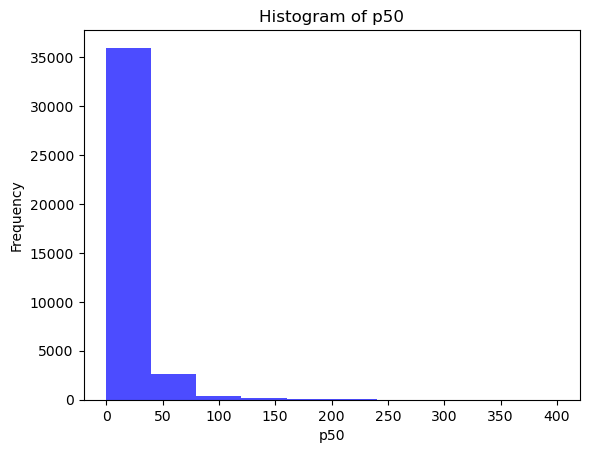

In [32]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called "your_data" and has a column "p50"
plt.hist(df['p50'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of p50')
plt.xlabel('p50')
plt.ylabel('Frequency')
plt.show()

### Exlusion groups based on non physiologically values

In [33]:
# for p50 

# Numbers in the range (<10,>50) are not physiologically possible 
# Primary outcome so all values should be whithin the range 

sample_df_new = df[(df['p50'] > 10) & (df['p50'] < 50)]

In [34]:
column_names_final = sample_df_new.columns.tolist()

print("Column names:", column_names_final)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'hospitalid', 'teachingstatus', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_value', 'in_hospital_mortality', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_heart_rate', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet', 'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total', 'hfp_albumin', 'sofa_past_overall_24hr', 'teachingstatus_encoded', 'source_db_mimic_iii', 'source_db_mimic_iv', 'region_Northeast', 'region_South', 'region_West', 'race_ethnicity_Asian', 'race_ethnicit

In [35]:
## for ph 

# Assuming your DataFrame is called "your_data" and has a column "ph"
sample_df_new['pH'] = sample_df_new[sample_df_new['pH'] <= 7.81]['pH']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_55555/3667339608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['pH'] = sample_df_new[sample_df_new['pH'] <= 7.81]['pH']


In [36]:
## for cbc_hemoglobin
sample_df_new['cbc_hemoglobin'] = sample_df_new[sample_df_new['cbc_hemoglobin'] <= 20]['cbc_hemoglobin']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_55555/365939063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['cbc_hemoglobin'] = sample_df_new[sample_df_new['cbc_hemoglobin'] <= 20]['cbc_hemoglobin']


In [37]:
## BMI_admission
sample_df_new['BMI_admission'] = sample_df_new[sample_df_new['BMI_admission'] <= 100]['BMI_admission']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_55555/2112235615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['BMI_admission'] = sample_df_new[sample_df_new['BMI_admission'] <= 100]['BMI_admission']


In [38]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean' for other columns
imputer_mean = SimpleImputer(strategy='mean')

# Initialize SimpleImputer with strategy='median' for mortality column
imputer_median = SimpleImputer(strategy='median')

# Specify the columns to exclude from mean imputation
columns_to_exclude = ['in_hospital_mortality']  

# Filter columns with missing values excluding the specified column
columns_with_missing_values = [col for col in sample_df_new.columns if col not in columns_to_exclude]

# Create a copy of the dataframe for imputation
df_imputed = sample_df_new.copy()

# Apply mean imputation to columns other than the mortality column
df_imputed[columns_with_missing_values] = imputer_mean.fit_transform(df_imputed[columns_with_missing_values])

# Apply median imputation to the mortality column
df_imputed['in_hospital_mortality'] = imputer_median.fit_transform(df_imputed[['in_hospital_mortality']])


# Now df_imputed contains your original dataset with all missing values imputed using the right method

N.B: For binary columns, it is crutial to consider the right imputation method; using Median Imputation instead of mean imputation, consider using median imputation for missing values. The median is a robust statistic that won't introduce non-binary values, and it can be a better choice for binary target variables.

In [39]:
df = df_imputed

### Profile Report

In [40]:
# import pandas as pd
# import pandas_profiling  # Import the pandas_profiling library
# from pandas_profiling import ProfileReport

# # sample_df = df_cleaned_fromMissing.sample(frac=0.1)  # Use 50% of the data for profiling

# # Generate a profile report for the DataFrame
# # profile = pandas_profiling.ProfileReport(sample_df, pool_size=4) 
# profile = pandas_profiling.ProfileReport(sample_df)

N.B: Very computationally heavy. Thus we are: 
* Only using a percentage of the data for profiling
* Parallel Processing: If your system supports it, you can enable parallel processing using the pool_size parameter. This can help distribute computations across multiple CPU cores.
* Turn Off Specific Analyses: The pandas_profiling.ProfileReport() function has several parameters that allow you to customize the analyses performed. For example, you can turn off correlation computations or histogram calculations if they are not essential for your analysis.




### Removing outliers

- **Reason to Remove Outliers: Impact on Clustering:** Outliers can significantly affect the results of clustering algorithms like k-means. Clusters might be pulled or stretched due to the presence of outliers, leading to suboptimal results.
- **Reason to Keep Outliers: Algorithm Robustness:** Some clustering algorithms, like hierarchical clustering or DBSCAN, are more robust to the presence of outliers. They might naturally form separate clusters or noise groups.

### Dimentionality reduction
Performing dimensionality reduction before clustering might not be the best approach, as our primary goal is  to understand the characteristics and differences among clusters based on certain features (like gender),

### Normasation and Standarization: 
If needed, normalize or standardize your data to ensure that features with different scales don't disproportionately influence the clustering process.

In [41]:
# # IF NORMALISATION IS NEEDED  
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Select columns to standardize
# # columns_to_standardize = ['valence', 'speechiness', 'loudness', 'liveness' , 'instrumentalness', 'energy', 'duration_ms', 'danceability', 'acousticness', 'popularity', 'instance_id']

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the selected columns
# scaler.fit(df_imputed)

# # Transform the selected columns
# df_imputed = scaler.transform(df_imputed)

# Clustering

## Choosing the Number of Clusters (K)

- The choice of K (number of clusters) is crucial. There are several methods to help you determine an optimal K, such as the elbow method, silhouette score, or gap statistic. These methods can help you decide on an appropriate number of clusters based on your data.
    
Working with unsupervised clustering to get the clusters from the data

## K means 

### Elbow Method

The elbow method is a heuristic technique used to determine the optimal number of clusters in a clustering algorithm, such as k-means. It is called the "elbow method" because when the number of clusters increases, the reduction in within-cluster sum of squares (inertia) tends to form an "elbow" shape on a plot. The point where the reduction starts to slow down represents a reasonable estimate of the optimal number of clusters.

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# List to store the within-cluster sum of squares (inertia) for different k values
inertia_values = []

# Range of k values to test
k_range = range(1, 11)

# Calculate inertia for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_imputed)
    inertia_values.append(kmeans.inertia_)


/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

We plot the elbow curve to visualize the inertia values for different k values. The "elbow" point in the plot represents a point of diminishing returns, indicating the optimal number of clusters.

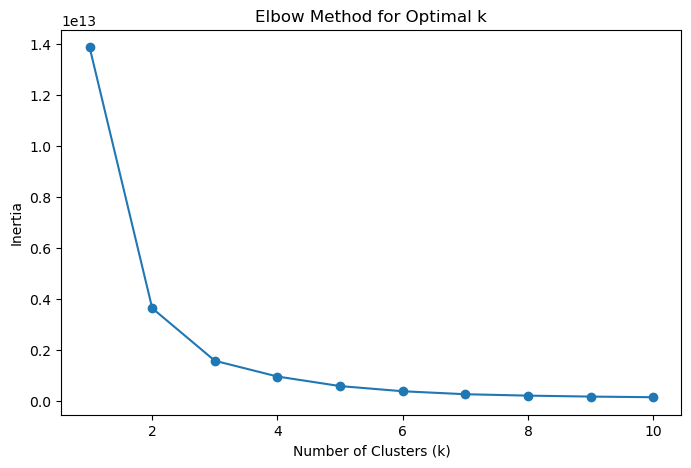

In [43]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In your plotted graph, look for the point where the inertia starts decreasing more slowly after an initial steep drop. This point is usually considered the "elbow" and represents a good choice for the number of clusters.

Keep in mind that sometimes the elbow might not be very clear, especially in complex datasets. In such cases, you might need to make a subjective decision based on the trade-off between simplicity (fewer clusters) and capturing meaningful structure in your data (more clusters).

Once you've identified the point, the corresponding value of 'k' is a reasonable choice for the number of clusters in your KMeans clustering analysis.

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


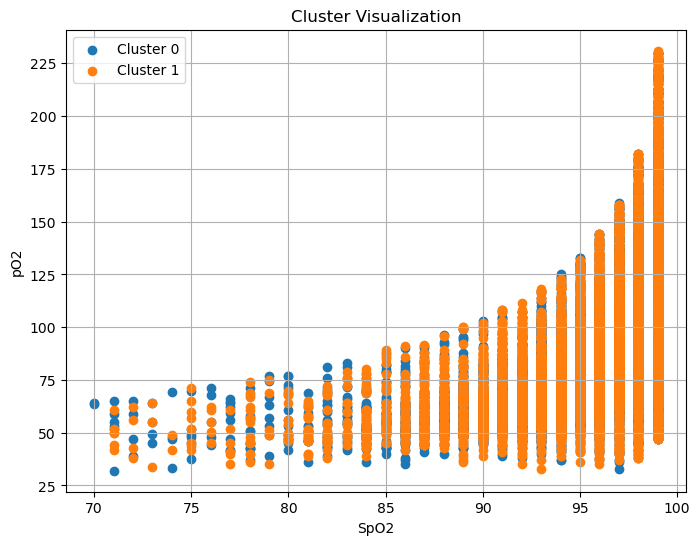

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you've already determined that 2 is the optimal number of clusters
num_clusters = 2

# Create a KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_imputed)  # Fit the model

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the clusters and data points
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for cluster_id in range(num_clusters):
    plt.scatter(
        df_imputed['SpO2'][cluster_labels == cluster_id],  # Replace with your desired feature 1 column
        df_imputed['pO2'][cluster_labels == cluster_id],  # Replace with your desired feature 2 column
        label=f'Cluster {cluster_id}'
    )

plt.xlabel('SpO2')  # Replace with your desired x-axis label
plt.ylabel('pO2')  # Replace with your desired y-axis label
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()


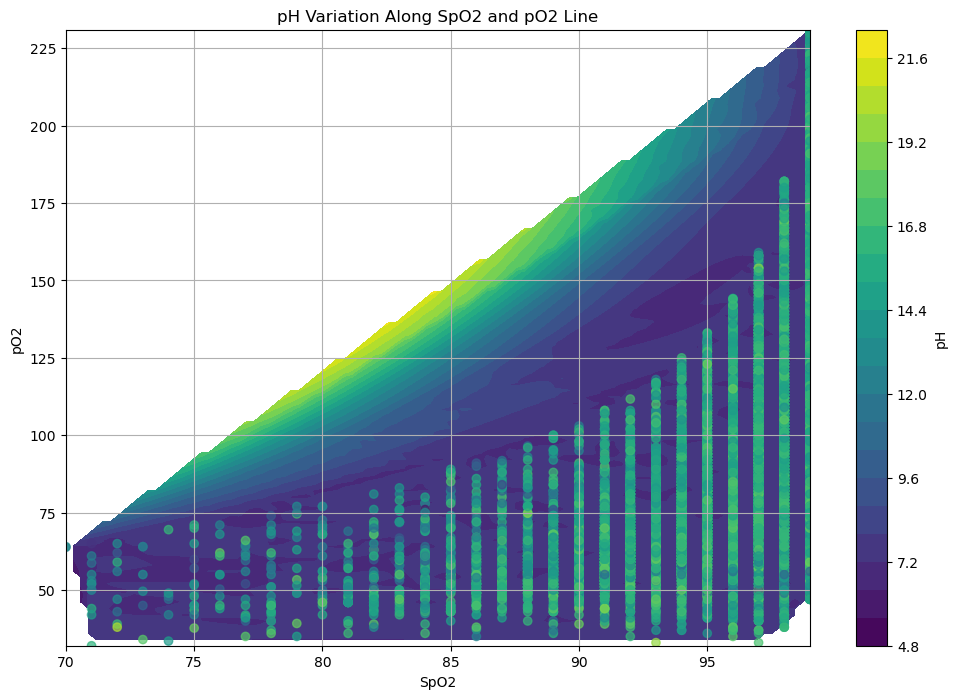

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a grid of points along the line formed by 'SpO2' and 'pO2'
num_points = 100
min_SpO2 = df_imputed['SpO2'].min()
max_SpO2 = df_imputed['SpO2'].max()
min_pO2 = df_imputed['pO2'].min()
max_pO2 = df_imputed['pO2'].max()

grid_SpO2, grid_pO2 = np.meshgrid(
    np.linspace(min_SpO2, max_SpO2, num_points),
    np.linspace(min_pO2, max_pO2, num_points)
)

# Interpolate 'pH' values for the grid points
grid_pH = griddata(
    (df_imputed['SpO2'], df_imputed['pO2']),
    df_imputed['pH'],
    (grid_SpO2, grid_pO2),
    method='cubic'
)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the interpolated pH values as a contour plot
contour = plt.contourf(grid_SpO2, grid_pO2, grid_pH, levels=20, cmap='viridis')
plt.colorbar(contour, label='pH')

# Scatter plot of the actual data points
plt.scatter(df_imputed['SpO2'], df_imputed['pO2'], c=df_imputed['pH'], cmap='viridis', alpha=0.7)

plt.xlabel('SpO2')
plt.ylabel('pO2')
plt.title('pH Variation Along SpO2 and pO2 Line')

plt.grid(True)
plt.show()


In [46]:
import seaborn as sns

# Replace 'variable' with the actual column name of the variable
variable_data = df_imputed['pH']

mean_value = variable_data.mean()
median_value = variable_data.median()

print(mean_value)
print(median_value)

7.357746436415313
7.37


### K means in 2D

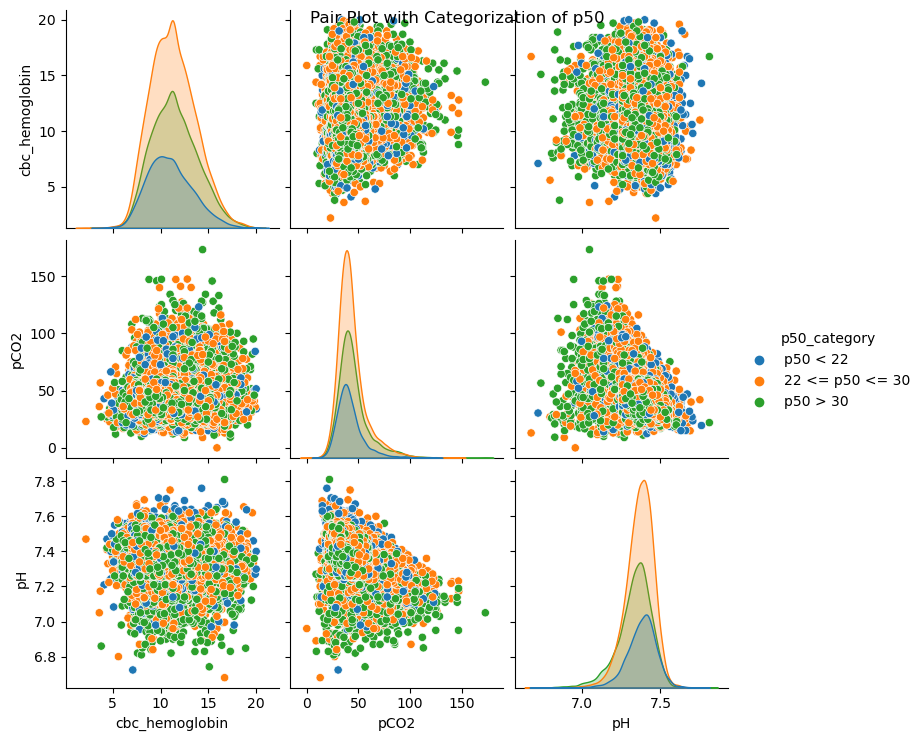

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Categorize p50 values based on defined bins
df_imputed['p50_category'] = pd.cut(df_imputed['p50'], bins=p50_bins, labels=p50_labels)

# Select relevant features for visualization
relevant_features = ['cbc_hemoglobin', 'pCO2', 'pH', 'p50_category']

# Prepare data using relevant features
data_for_plot = df_imputed[relevant_features]

# Create pair plot with color-coded categories
sns.pairplot(data_for_plot, hue='p50_category', diag_kind='kde')
plt.suptitle('Pair Plot with Categorization of p50')
plt.show()


### K means in 3D

In [48]:
# Get values in the 'p50' column for the range '22 <= p50 <= 30'
p50_range_values = df_imputed[(df_imputed['p50'] >= 22) & (df_imputed['p50'] <= 30)]['p50']

if not p50_range_values.empty:
    print("Values in the '22 <= p50 <= 30' range:")
    print(p50_range_values)
else:
    print("There are no values in the '22 <= p50 <= 30' range.")


Values in the '22 <= p50 <= 30' range:
9        27.041090
13       26.234485
18       27.575510
21       24.594829
23       26.755061
           ...    
49070    27.054312
49075    28.878259
49089    22.187561
49090    26.234485
49091    23.778308
Name: p50, Length: 11546, dtype: float64


### Relating to Regions 

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

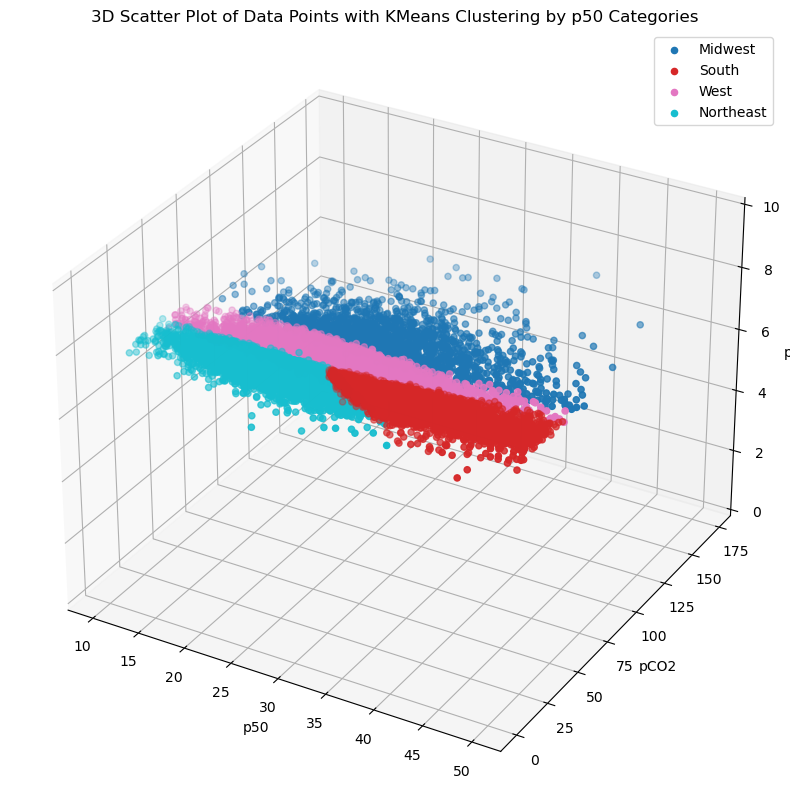

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['Midwest', 'South', 'West', 'Northeast']


# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

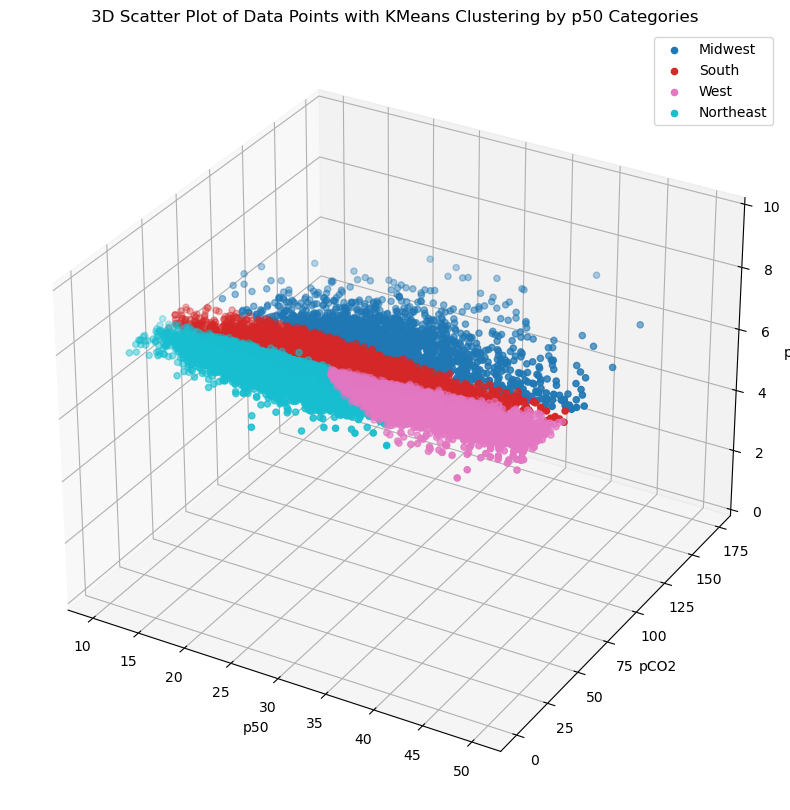

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['Midwest', 'South', 'West', 'Northeast']

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']
# relevant_features = ['SpO2', 'pO2', 'pH']


# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()

### Relating to ranges of p50 

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

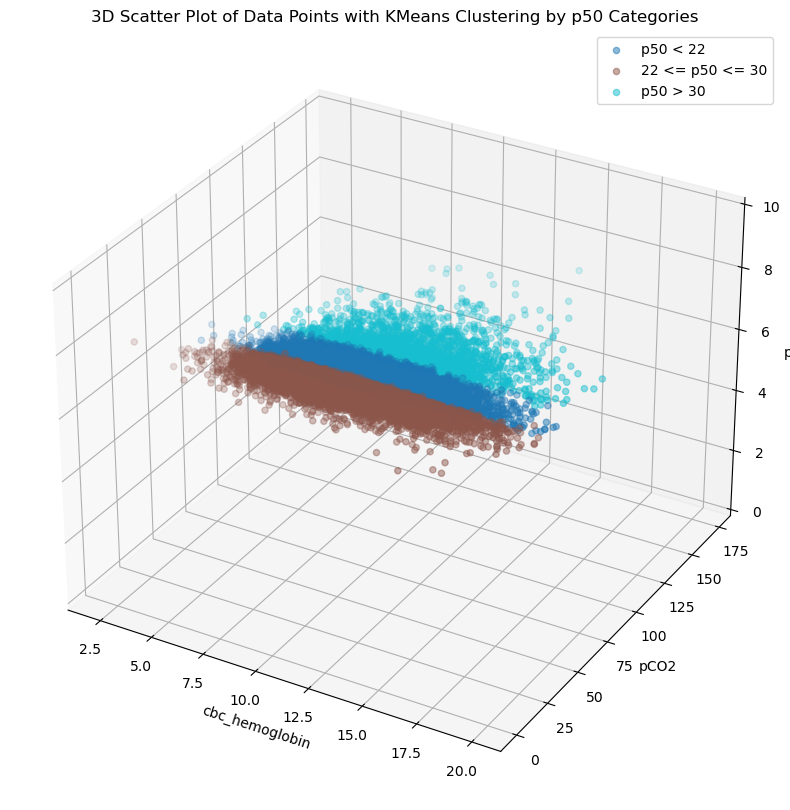

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# categorise p50 -> <22 , 22-30, 30> 
# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Select relevant features for visualization
# relevant_features = ['SpO2', 'pO2', 'pH']
# p50 -> dependent variable 
# cbc_hemoglobin, pH -> independent
relevant_features = ['cbc_hemoglobin', 'pCO2', 'pH']

# Prepare data using regions and relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(p50_labels))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to regions with transparency (alpha value)
color_map = plt.cm.get_cmap('tab10', len(p50_labels))

# Plot the data points with color coding based on regions and transparency
for i, p50_category in enumerate(p50_labels):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i, alpha=0.5), label=p50_category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
# ax.set_xlim(0, 100)  # Adjust the limits as needed
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

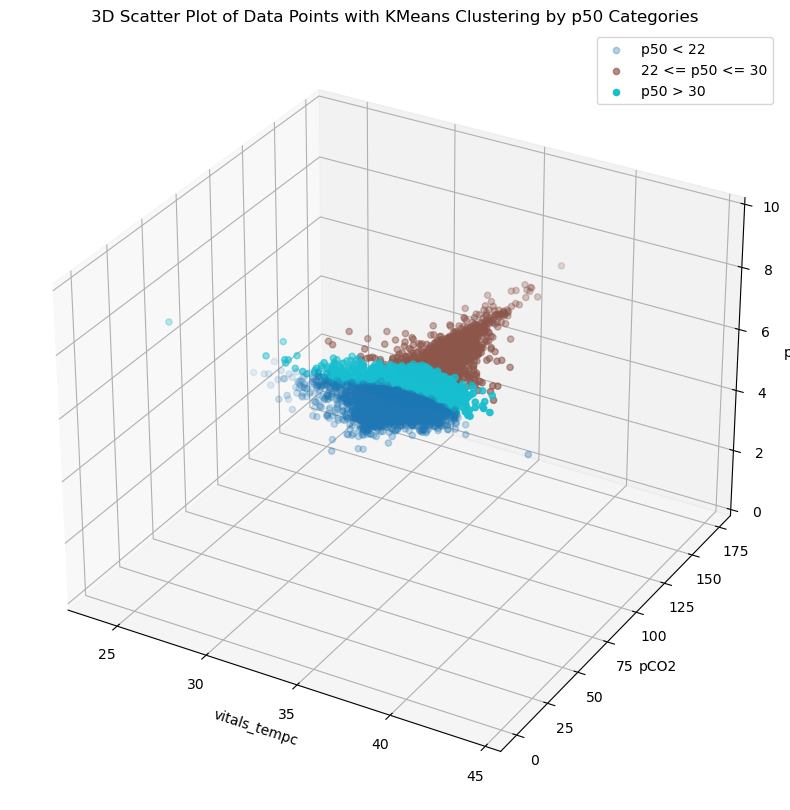

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# categorise p50 -> <22 , 22-30, 30> 
# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Select relevant features for visualization
relevant_features = ['vitals_tempc', 'pCO2', 'pH']

# Prepare data using regions and relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(p50_labels))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to regions with varying transparency (alpha values)
color_map = plt.cm.get_cmap('tab10', len(p50_labels))

# Vary transparency based on the index
for i, p50_category in enumerate(p50_labels):
    indices = np.where(cluster_labels == i)[0]
    alpha_value = (i + 1) / len(p50_labels)  # Vary transparency based on index
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i, alpha=alpha_value), label=p50_category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
# ax.set_xlim(0, 100)  # Adjust the limits as needed
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


### Relating to Race

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

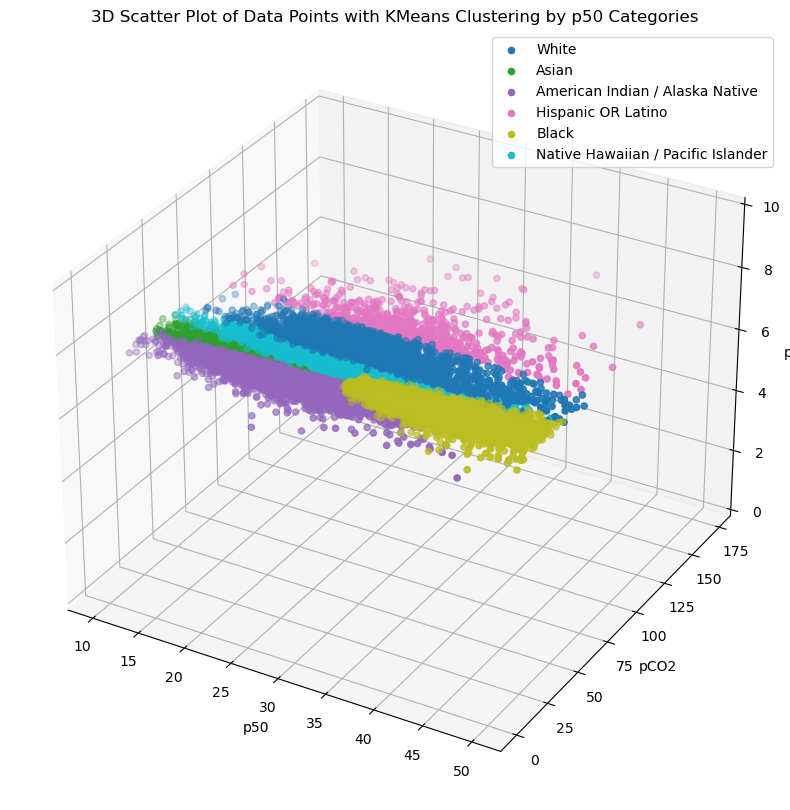

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['White', 'Asian', 'American Indian / Alaska Native', 'Hispanic OR Latino', 'Black', 'Native Hawaiian / Pacific Islander']

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


### Relating to Sex 

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


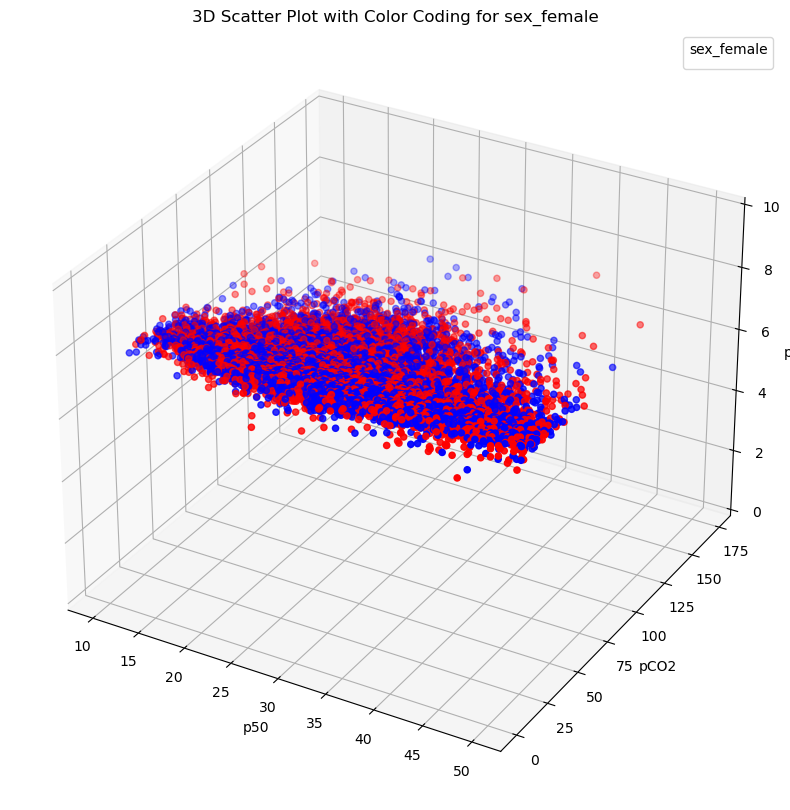

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on 'sex_female' column
colors = np.where(df_imputed['sex_female'] == 1, 'r', 'b')  # Red for female, blue for not female

# Plot the data points with color coding based on 'sex_female' column
scatter = ax.scatter(X[relevant_features[0]], X[relevant_features[1]], X[relevant_features[2]], c=colors)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot with Color Coding for sex_female')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend(*scatter.legend_elements(), title='sex_female')

# Show the plot
plt.show()


## DBSCAN
We can perform clustering, including DBSCAN, without converting categorical variables into numerical ones. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can work directly with categorical variables without requiring explicit numerical encoding.
Background: DBSCAN operates by defining clusters as dense regions of data points separated by areas of lower density. This makes it suitable for discovering clusters of arbitrary shapes and handling noise.




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


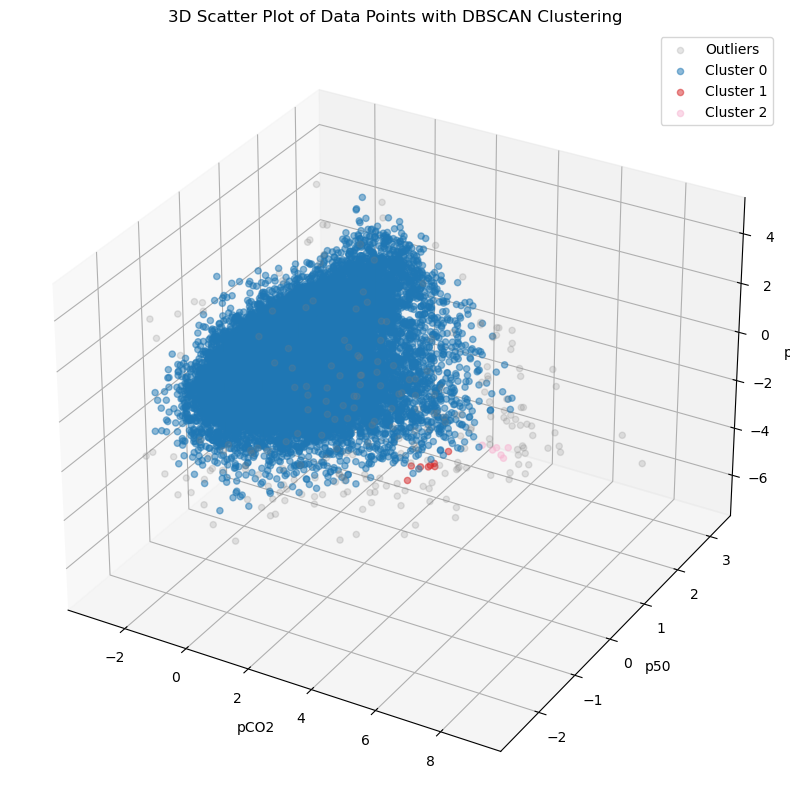

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select relevant features for visualization
relevant_features = ['pCO2', 'p50', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Scale the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color coding based on clusters
unique_labels = np.unique(cluster_labels)
color_map = plt.cm.get_cmap('tab20', len(unique_labels))

for label in unique_labels:
    if label == -1:  # Outliers
        indices = np.where(cluster_labels == label)[0]
        ax.scatter(X_scaled[indices, 0], X_scaled[indices, 1], X_scaled[indices, 2], c='gray', label='Outliers', alpha=0.2)
    else:
        indices = np.where(cluster_labels == label)[0]
        ax.scatter(X_scaled[indices, 0], X_scaled[indices, 1], X_scaled[indices, 2], c=color_map(label), label=f'Cluster {label}', alpha=0.5)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with DBSCAN Clustering')

# Add legend
ax.legend()

# Show the plot
plt.show()


## tSNE

In [56]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from scipy.spatial.distance import cdist
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# # Generate 2D embedding using t-SNE with perplexity=20
# tsne = TSNE(n_components=2, perplexity=20, random_state=42)
# embedding = tsne.fit_transform(df_imputed)

# # Determine optimal  number of clusters using Silhouette method
# sil_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(embedding)
#     sil_score = silhouette_score(embedding, cluster_labels)
#     sil_scores.append(sil_score)

In [57]:
# from sklearn.cluster import DBSCAN
# import numpy as np

# optimal_k = np.argmax(sil_scores) + 2

# print('Optimal number of clusters:', optimal_k)

In [58]:
# # Plot Silhouette scores
# plt.plot(range(2,11), sil_scores)
# plt.title('Silhouette Scores')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

# # Generate plot with each wine represented as a dot in a 2D space in the color of its cluster
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# cluster_labels = kmeans.fit_predict(embedding)
# cluster_centers = kmeans.cluster_centers_

# plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
# plt.title('t-SNE Embedding with {} Clusters'.format(optimal_k))
# plt.show()

# # Compute sum of distances of all points to their respective cluster centers
# distances = cdist(embedding, cluster_centers, 'euclidean')
# min_distances = np.min(distances, axis=1)
# sum_distances = np.sum(min_distances)

# print('Total sum of distance of all points to their respective cluster centers:', sum_distances)

# p50/lactate impact on mortality 

In [59]:
data = df_imputed

In [60]:
data.head()

unique_subject_id  unique_hospital_admission_id  unique_icustay_id  \
1                 1.0                           1.0                1.0   
2                 2.0                           2.0                2.0   
9                 9.0                           9.0                9.0   
12               12.0                          12.0               12.0   
13               13.0                          13.0               13.0   

    hospitalid  teachingstatus  admission_age  sex_female  weight_admission  \
1         71.0             0.0           83.0         1.0         87.908864   
2         73.0             1.0           59.0         1.0         74.100000   
9         71.0             0.0           60.0         0.0        125.900000   
12        73.0             1.0           65.0         0.0         77.100000   
13        73.0             1.0           44.0         0.0        262.400000   

    height_admission  BMI_admission  ...  region_West  race_ethnicity_Asian  \
1              162.6      30.461989  ...          0.0                   0.0   
2              162.6      28.027033  ...          0.0                   0.0   
9              172.7      42.212498  ...          0.0                   0.0   
12             185.4      22.430292  ...          0.0                   0.0   
13             190.5      72.305922  ...          0.0                   0.0   

    race_ethnicity_Black  race_ethnicity_Hispanic OR Latino  \
1                    0.0                                0.0   
2                    0.0                                0.0   
9                    0.0                                0.0   
12                   0.0                                0.0   
13                   0.0                                0.0   

    race_ethnicity_More Than One Race  \
1                                 0.0   
2                                 0.0   
9                                 0.0   
12                                0.0   
13                                0.0   

    race_ethnicity_Native Hawaiian / Pacific Islander  race_ethnicity_Unknown  \
1                                                 0.0                     0.0   
2                                                 0.0                     0.0   
9                                                 0.0                     0.0   
12                                                0.0                     0.0   
13                                                0.0                     0.0   

    race_ethnicity_White        p50     p50_category  
1                    1.0  43.471717         p50 > 30  
2                    1.0  31.547938         p50 > 30  
9                    1.0  27.041090  22 <= p50 <= 30  
12                   1.0  48.718303         p50 > 30  
13                   1.0  26.234485  22 <= p50 <= 30  

[5 rows x 68 columns]

### Checking if there is significant correlation between this and lactate
Anion Gap (bmp_aniongap) – High anion gap is associated with poor outcomes. Will have to see if there is significant correlation between this and lactate. If there is significant correlation, only pick lactate.

In [61]:
import pandas as pd

# Select the relevant variables for correlation check
variables_to_check = ['bmp_aniongap', 'bmp_lactate']

# Create a subset DataFrame with the selected variables
subset_data = data[variables_to_check]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Print the correlation matrix
print(correlation_matrix)

              bmp_aniongap  bmp_lactate
bmp_aniongap      1.000000     0.322272
bmp_lactate       0.322272     1.000000


A correlation coefficient of 0.322272 indicates that there is some positive relationship between 'bmp_aniongap' and 'bmp_lactate', but it's not extremely strong. Therefore, we will keep both features. 

## Fit the logistic regression model 

In [62]:
import pandas as pd
import statsmodels.api as sm

# Select the relevant variables
variables = ['BMI_admission', 'sex_female', 'admission_age', 'p50', 'sofa_past_overall_24hr', 'cbc_hemoglobin', 'bmp_aniongap', 'bmp_lactate', 'bmp_sodium', 'hfp_alt', 'in_hospital_mortality','pO2', 'SpO2', 'pH', 'pCO2', 'vitals_tempc', 'race_ethnicity_Asian', 'race_ethnicity_Black', 'race_ethnicity_Hispanic OR Latino', 'race_ethnicity_More Than One Race', 'race_ethnicity_Native Hawaiian / Pacific Islander', 'race_ethnicity_Unknown', 'race_ethnicity_White']

# Create a subset DataFrame with the selected variables
subset_data = data[variables].copy()

# Add a constant term for the intercept in the logistic regression
subset_data = sm.add_constant(subset_data)

Note on adding a constant term for the intercept in the logistic regression: 
* The intercept term represents the value of the dependent variable when all independent variables are zero. It's an important part of the model and accounts for the vertical shift of the regression line.

In [63]:
# Define the predictors (independent variables) and the target (dependent variable)
X = subset_data.drop('in_hospital_mortality', axis=1)
y = subset_data['in_hospital_mortality']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.409015
         Iterations 16
                             Logit Regression Results                            
Dep. Variable:     in_hospital_mortality   No. Observations:                23222
Model:                             Logit   Df Residuals:                    23199
Method:                              MLE   Df Model:                           22
Date:                   Mon, 28 Aug 2023   Pseudo R-squ.:                  0.1347
Time:                           13:22:37   Log-Likelihood:                -9498.1
converged:                          True   LL-Null:                       -10977.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const

In the printed summary, you can find the coefficients for 'lactate' and 'p50'. Pay attention to the coefficients' values, standard errors, and p-values. The magnitude and significance of these coefficients will help you assess the predictive power of 'lactate' versus 'p50' in predicting mortality. If a coefficient has a larger magnitude and a lower p-value, it suggests a stronger influence on the outcome.

* Variables with p-values close to 0 (e.g., 'admission_age', 'sofa_past_overall_24hr', 'cbc_hemoglobin', 'bmp_aniongap', 'bmp_lactate', 'pO2', 'SpO2', 'pH', 'pCO2', 'vitals_tempc') are likely to have a statistically significant impact on the outcome ('in_hospital_mortality').

* Variables with higher p-values (e.g., 'sex_female', 'race_ethnicity' categories) might not be statistically significant predictors in this model.

* Negative coefficients indicate a decrease in the log-odds of the outcome, while positive coefficients indicate an increase, for a one-unit increase in the predictor.

* The confidence intervals provide a range within which you can be reasonably confident the true coefficient lies.

### Visualisation 

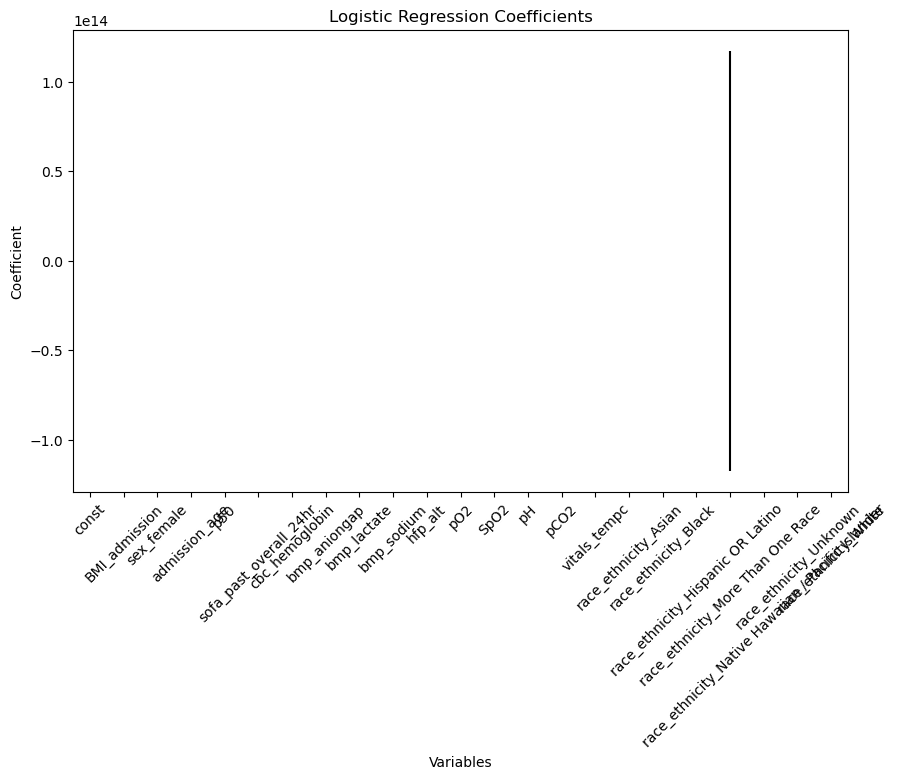

In [64]:
import matplotlib.pyplot as plt

# Extract coefficient estimates and confidence intervals
coef = result.params
conf_int = result.conf_int()

# Create a bar plot of coefficients
plt.figure(figsize=(10, 6))
coef.plot(kind='bar', yerr=(coef - conf_int[0], conf_int[1] - coef), color='blue', alpha=0.7)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

## Building a predictive model 

* Train the logistic regression model with both 'lactate' and 'p50' as predictor variables.
* Examine the coefficients of 'lactate' and 'p50' to understand their individual impacts on the log-odds of mortality.
* Compare the coefficients and their significance to assess the relative predictive power of 'lactate' and 'p50'.

### 1. Build a baseline model using the selected features to predict mortality (without p50) 
This is the model that uses only the SOFA score to predict mortality. 

Given the focus on comparing the predictive power of "p50" with SOFA score, we are starting with the baseline features that are commonly used for predicting mortality:
* SOFA score: "sofa_past_overall_24hr"
* Comorbidity score: "comorbidity_score_value"
* Hemoglobin: "cbc_hemoglobin"
* Anion Gap: "bmp_aniongap"
* Lactate: "bmp_lactate"
* Sodium: "bmp_sodium"
* ALT: "hfp_alt"

#### Logistic Regression 

In [67]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select the relevant variables
predictor_vars = ['sofa_past_overall_24hr', 'comorbidity_score_value','cbc_hemoglobin','bmp_aniongap', 'bmp_lactate', 'bmp_sodium', 'hfp_alt']

target_var = 'in_hospital_mortality'

In [68]:
X = data[predictor_vars]
y = data[target_var]

In [69]:
import pandas as pd

# Count the occurrences of each class
class_counts = data['in_hospital_mortality'].value_counts()

# Calculate the total number of samples
total_samples = len(data)

# Calculate the percentage of each class
class_percentages = class_counts / total_samples * 100

# Print the class distribution with percentages
for class_label, count in class_counts.items():
    percentage = class_percentages[class_label]
    print(f"Class {class_label}: Count = {count}, Percentage = {percentage:.2f}%")

Class 0.0: Count = 19022, Percentage = 81.91%
Class 1.0: Count = 4200, Percentage = 18.09%


In [70]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [71]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logit_model = LogisticRegression()

# Train the model
logit_model.fit(X_train_scaled, y_train)

# to do show the weights - how it is done in clinical papers.. 

LogisticRegression()

In [73]:
# Run inference on the test set
# Predict probabilities on the testing set
y_pred_probs = logit_model.predict_proba(X_test_scaled)

In [74]:
y_pred_probs

array([[0.9128852 , 0.0871148 ],
       [0.76051655, 0.23948345],
       [0.85693643, 0.14306357],
       ...,
       [0.83385109, 0.16614891],
       [0.8241008 , 0.1758992 ],
       [0.7715353 , 0.2284647 ]])

In [75]:
# y_pred_probs will be an array with two columns: [probability_of_class_0, probability_of_class_1]
# In your case, you're interested in the probability of class 1 (mortality)
predicted_mortality_probs = y_pred_probs[:, 1]

In [76]:
# Evaluate the model using predicted probabilities (you need to set a threshold)
threshold = 0.5  # You can adjust the threshold based on your requirements
y_pred = (predicted_mortality_probs > threshold).astype(int)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have y_test containing the actual ground truth labels
# y_pred contains the predicted binary class labels after applying the threshold

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8310010764262648
Precision: 0.6369047619047619
Recall: 0.12876052948255115
F1-score: 0.21421421421421424
Confusion Matrix:
 [[3753   61]
 [ 724  107]]


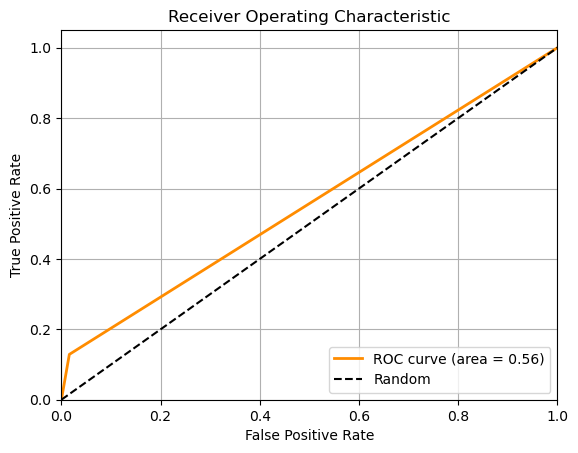

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### Trying other models

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming  X_train, X_test, y_train, y_test are already prepared

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True)  # Note: SVM needs probability estimates for ROC-AUC
}

# Initialize dictionaries to store performance metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC-AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(roc_auc)

# Create a pandas DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table
print(metrics_df)

               Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0      Random Forest  0.829709   0.611111  0.132371  0.217606  0.703437
1  Gradient Boosting  0.832293   0.632653  0.149218  0.241480  0.735521
2                SVM  0.715393   0.329868  0.572804  0.418646  0.710932


### 2. Enhanced Model with "p50"
This is the model that includes the variable p50 in addition to the SOFA score to predict mortality. You will need to train, evaluate, and compare the performance of this enhanced model to the baseline model.

In [82]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select the relevant variables
predictor_vars = ['p50','sofa_past_overall_24hr', 'comorbidity_score_value' ,'cbc_hemoglobin','bmp_aniongap', 'bmp_lactate', 'bmp_sodium', 'hfp_alt']

target_var = 'in_hospital_mortality'

In [83]:
# Split the data into training and test sets
X = data[predictor_vars]
y = data[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [84]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logit_model = LogisticRegression()

# Train the model
logit_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [86]:
# Run inference on the test set
# Predict probabilities on the testing set
y_pred_probs = logit_model.predict_proba(X_test_scaled)

In [87]:
# y_pred_probs will be an array with two columns: [probability_of_class_0, probability_of_class_1]
# In your case, you're interested in the probability of class 1 (mortality)
predicted_mortality_probs = y_pred_probs[:, 1]

In [88]:
# Evaluate the model using predicted probabilities (you need to set a threshold)
threshold = 0.5  # You can adjust the threshold based on your requirements
y_pred = (predicted_mortality_probs > threshold).astype(int)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have y_test containing the actual ground truth labels
# y_pred contains the predicted binary class labels after applying the threshold

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8322927879440258
Precision: 0.6511627906976745
Recall: 0.13477737665463296
F1-score: 0.2233300099700897
Confusion Matrix:
 [[3754   60]
 [ 719  112]]


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming  X_train, X_test, y_train, y_test are already prepared

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)  # Note: SVM needs probability estimates for ROC-AUC
}

# Initialize dictionaries to store performance metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC-AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(roc_auc)

# Create a pandas DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table
print(metrics_df)


               Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0      Random Forest  0.830786   0.638037  0.125150  0.209256  0.720081
1  Gradient Boosting  0.831647   0.621891  0.150421  0.242248  0.737686
2                SVM  0.720775   0.338419  0.587244  0.429388  0.716942


Let's break down the results for predicting mortality (a binary outcome) using the provided metrics:

1. **Random Forest:**
   - **Accuracy (0.830786):** Out of all predictions made by the model, around 83% are correct. This might seem good, but...
   - **Precision (0.638037):** Only about 64% of the instances that the model classified as positive (mortality) are actually true positives. This means there are a lot of false positive predictions.
   - **Recall (0.125150):** The model captures only about 13% of the actual positive instances. This means it's missing a substantial portion of cases where mortality is true.
   - **F1-Score (0.209256):** The F1-score takes into account both precision and recall. It's the harmonic mean of the two and provides a balance between them. A low F1-score indicates an imbalance between precision and recall.
   - **AUC-ROC (0.720081):** The AUC-ROC score measures the model's ability to distinguish between the two classes. A score of 0.72 suggests moderate discriminative power.

2. **Gradient Boosting:**
   - **Accuracy (0.831647):** Again, around 83% of the predictions are correct, but...
   - **Precision (0.621891):** About 62% of the positive predictions are true positives, while...
   - **Recall (0.150421):** Only around 15% of the actual positive instances are captured.
   - **F1-Score (0.242248):** The F1-score is higher than the Random Forest but still relatively low, indicating a trade-off between precision and recall.
   - **AUC-ROC (0.737686):** The AUC-ROC score is slightly higher, indicating slightly better classification performance compared to the Random Forest.

3. **SVM:**
   - **Accuracy (0.720775):** The accuracy drops to 72%, but...
   - **Precision (0.338419):** Only about 34% of the positive predictions are true positives.
   - **Recall (0.587244):** The model captures around 59% of the actual positive instances.
   - **F1-Score (0.429388):** The F1-score is relatively higher, indicating a balance between precision and recall.
   - **AUC-ROC (0.716942):** The AUC-ROC score suggests moderate discriminative power.

In summary, while accuracy might seem acceptable, the models are struggling to accurately predict the positive class (mortality). The Precision-Recall trade-off is a common challenge when dealing with imbalanced datasets. Depending on the specific problem and domain, you might need to prioritize either precision (minimizing false positives) or recall (capturing true positives) more. Evaluating the models using multiple metrics provides a better understanding of their performance. If capturing true positive cases (mortality) is particularly important, you might focus more on improving recall, even if it means accepting a slightly lower precision.

In [93]:
# TAKES 8min 10s TO RUN 

%%time

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Assuming X and y are already prepared

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)
}

# Initialize dictionaries to store performance metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

# Initialize StratifiedKFold
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Train and evaluate each model using cross-validation
for model_name, model in models.items():
    y_pred_cv = cross_val_predict(model, X, y, cv=cv)
    y_prob_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

    accuracy = accuracy_score(y, y_pred_cv)
    precision = precision_score(y, y_pred_cv)
    recall = recall_score(y, y_pred_cv)
    f1 = f1_score(y, y_pred_cv)
    roc_auc = roc_auc_score(y, y_prob_cv)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(roc_auc)

# Create a pandas DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table
print(metrics_df)

               Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0      Random Forest  0.829601   0.649446  0.125714  0.210652  0.713851
1  Gradient Boosting  0.831324   0.634378  0.159048  0.254331  0.737288
2                SVM  0.752907   0.355397  0.450000  0.397142  0.701144
CPU times: user 7min 42s, sys: 11.6 s, total: 7min 53s
Wall time: 8min 10s
